In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.patches as mpatches
import datetime as dt

# Raw data file
file_to_load = "output/data_cleaned.csv"

# Read orders file and store into pandas data frame
orders_data = pd.read_csv(file_to_load)
print(orders_data)

      Unnamed: 0  ROW_ID  ORDER_ID  ORDER_DATE       PRIORITY  QUANTITY  \
0              0       1         3  10/13/1982            Low         6   
1              1    1930     13795   4/10/2011  Not Specified        37   
2              2    1929     13795   4/10/2011  Not Specified        23   
3              3    1928     13795   4/10/2011  Not Specified        30   
4              4    2384     17286   9/21/2010           High         7   
...          ...     ...       ...         ...            ...       ...   
8394        8394    8347     59680   6/18/2012       Critical        15   
8395        8395    3187     22880   5/30/2010         Medium        13   
8396        8396    7041     50276   2/14/2011  Not Specified        34   
8397        8397    7961     56900  11/26/2011  Not Specified        16   
8398        8398    7974     57056   11/8/2012            Low        29   

        SALES  DISCOUNT            MODE   PROFIT  ...         SEGMENT  \
0      261.54      0.04   

# Display the total number of Customers

In [2]:
# Use the length to calculate the unique total customers
total_customers = len(orders_data["CUSTOMER_ID"].unique())
#print(total_customers)

# Create a data frame to show the total number of players
number_customers = pd.DataFrame({"Total Customers":[total_customers]})
number_customers

,Total Customers
0,795


# Orders Analysis (Total)

* Number of Unique Products


* Average Unit Price


* Total Number of Orders


* Total Number of Unique Orders


* Total Revenue

In [3]:
# Calculations for unique products, average price of the products, number of orders, and revenue
number_of_products = len((orders_data["PRODUCT_NAME"]).unique())
average_price = (orders_data["UNIT_PRICE"]).mean()
number_of_orders = (orders_data["ORDER_ID"]).count()
number_of_unique_orders = (orders_data["ORDER_ID"]).nunique()
total_revenue = (orders_data["SALES"]).sum()
#number_of_items, average_price, number_of_orders, number_of_unique_orders, total_revenue

# Create data frame and cleaning format
summary_df = pd.DataFrame({"Number of Unique Products":[number_of_products],
                           "Average Price":[average_price], 
                           "Number of Orders": [number_of_orders],
                           "Number of Unique Orders": [number_of_unique_orders], 
                           "Total Revenue": [total_revenue]})
summary_df.style.format({'Average Price':"${:,.2f}",
                         'Total Revenue': '${:,.2f}'})

,Number of Unique Products,Average Price,Number of Orders,Number of Unique Orders,Total Revenue
0,1263,$89.30,8399,5496,"$14,915,600.82"


# Customer Analysis

* Percentage and Count of Total Orders by Customers

In [4]:
# Group by CUSTOMER_NAME and Count by ORDER_ID
orders_group = orders_data.groupby("CUSTOMER_NAME")
total_orders = orders_group.count()["ORDER_ID"]
total_unique_orders = orders_group.nunique()["ORDER_ID"]
#orders_group, total_orders

# Calculate the percentage of orders
percentage = total_orders / total_customers * 100
#percentage

# Create data frame, clean format and list them by our best customers
customers_table = pd.DataFrame({"Percentage of Orders": round(percentage,2), "Total Orders": total_orders, "Total Unique                                   Orders": total_unique_orders})
#customers_table.style.format({"Percentage of Orders":"${:,.2f}"})
customers_table

,Percentage of Orders,Total Orders,Total Unique Orders
CUSTOMER_NAME,,,
Aaron Bergman,0.88,7,5
Aaron Hawkins,1.51,12,9
Aaron Smayling,1.76,14,8
Adam Bellavance,1.51,12,8
Adam Hart,3.40,27,18
...,...,...,...
Vivian Mathis,1.89,15,11
William Brown,2.89,23,15
Xylona Price,1.76,14,7


# Sales Analysis (Top 10 Total Orders by Customer)

* Top 10 best Customers and Total Sales

In [5]:
# Obtaining the customers sales per total orders 
customers_sales = orders_group["SALES"].sum()
#customers_sales

# Create data frame and cleaning format
summary_sales = pd.DataFrame({"Total Orders": total_orders, 
                                "Total Sales": round(customers_sales,2)})
summary_sales.sort_values(by='Total Orders', ascending = False).head(10)
#summary_sales.style.format({"Total Sales":"${:,.2f}"})

,Total Orders,Total Sales
CUSTOMER_NAME,,
Darren Budd,41,81577.34
Ed Braxton,38,75802.76
Brad Thomas,35,36909.51
Carlos Soltero,33,55575.09
Patrick Jones,30,35186.02
Tony Sayre,29,29860.56
Jack O'Briant,28,56974.69
Giulietta Dortch,28,58679.84
Joy Smith,28,40768.83


# Region Analysis

* Region by Manager

* Manager by Region

In [6]:
# Fill the NA values for 0 to obtain the number of North records.
orders_data['MANAGER'] = orders_data['MANAGER'].fillna(0)
orders_data.head()

,Unnamed: 0,ROW_ID,ORDER_ID,ORDER_DATE,PRIORITY,QUANTITY,SALES,DISCOUNT,MODE,PROFIT,...,SEGMENT,CATEGORY,SUB_CATEGORY,PRODUCT_NAME,PRODUCT_CONTAINER,SHIP_DATE,MANAGER,CUSTOMER_NAME,CUSTOMER_TYPE,ORDER_STATUS
0,0,1,3,10/13/1982,Low,6,261.54,0.04,Regular Air,-213.25,...,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,10/20/2010,0,Muhammed MacIntyre,Type - E,None
1,1,1930,13795,4/10/2011,Not Specified,37,1302.99,0.02,Regular Air,545.49,...,Small Business,Office Supplies,Paper,Xerox 1932,Small Box,4/11/2011,0,Muhammed MacIntyre,Type - E,None
2,2,1929,13795,4/10/2011,Not Specified,23,275.16,0.05,Express Air,43.35,...,Small Business,Office Supplies,Paper,Xerox 188,Small Box,4/13/2011,0,Muhammed MacIntyre,Type - E,None
3,3,1928,13795,4/10/2011,Not Specified,30,501.32,0.04,Regular Air,-119.08,...,Small Business,Office Supplies,Binders and Binder Accessories,"GBC Pre-Punched Binding Paper, Plastic, White,...",Small Box,4/13/2011,0,Muhammed MacIntyre,Type - E,None
4,4,2384,17286,9/21/2010,High,7,1810.67,0.09,Delivery Truck,-541.87,...,Small Business,Furniture,Chairs & Chairmats,Global Enterprise Series Seating High-Back Swi...,Jumbo Drum,9/22/2010,0,Muhammed MacIntyre,Type - E,None


In [7]:
orders_data['MANAGER'] = orders_data['MANAGER'].replace({0: 'XXX'})
orders_data.head()

,Unnamed: 0,ROW_ID,ORDER_ID,ORDER_DATE,PRIORITY,QUANTITY,SALES,DISCOUNT,MODE,PROFIT,...,SEGMENT,CATEGORY,SUB_CATEGORY,PRODUCT_NAME,PRODUCT_CONTAINER,SHIP_DATE,MANAGER,CUSTOMER_NAME,CUSTOMER_TYPE,ORDER_STATUS
0,0,1,3,10/13/1982,Low,6,261.54,0.04,Regular Air,-213.25,...,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,10/20/2010,XXX,Muhammed MacIntyre,Type - E,None
1,1,1930,13795,4/10/2011,Not Specified,37,1302.99,0.02,Regular Air,545.49,...,Small Business,Office Supplies,Paper,Xerox 1932,Small Box,4/11/2011,XXX,Muhammed MacIntyre,Type - E,None
2,2,1929,13795,4/10/2011,Not Specified,23,275.16,0.05,Express Air,43.35,...,Small Business,Office Supplies,Paper,Xerox 188,Small Box,4/13/2011,XXX,Muhammed MacIntyre,Type - E,None
3,3,1928,13795,4/10/2011,Not Specified,30,501.32,0.04,Regular Air,-119.08,...,Small Business,Office Supplies,Binders and Binder Accessories,"GBC Pre-Punched Binding Paper, Plastic, White,...",Small Box,4/13/2011,XXX,Muhammed MacIntyre,Type - E,None
4,4,2384,17286,9/21/2010,High,7,1810.67,0.09,Delivery Truck,-541.87,...,Small Business,Furniture,Chairs & Chairmats,Global Enterprise Series Seating High-Back Swi...,Jumbo Drum,9/22/2010,XXX,Muhammed MacIntyre,Type - E,None


In [8]:
# Group by REGION and Count the number of records by MANAGER
region_df = orders_data.groupby("REGION")
region_manager = region_df.count()["MANAGER"]

#Reset index
region_manager = region_manager.reset_index()
region_manager

,REGION,MANAGER
0,Central Canada,2607
1,The Atlantic Provinces,1080
2,The Northern Territories,1015
3,The Prarie Provinces,1706
4,The West Coast,1991


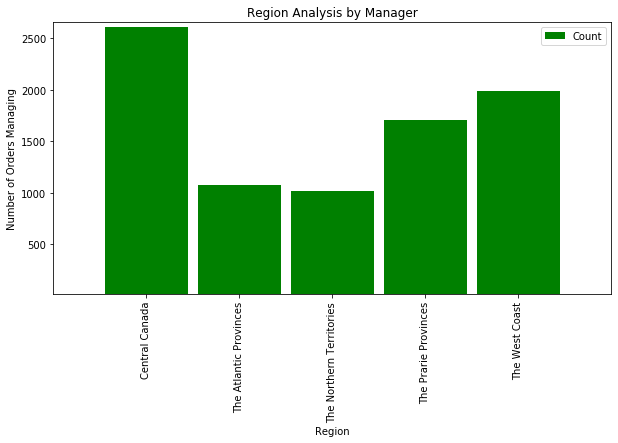

In [9]:
region = orders_data.groupby("REGION")['MANAGER'].count()
region.plot(kind='bar', facecolor ='green', figsize=(10,5), width=0.9,label = 'Count')

# Set x and y limits
x_axis = np.arange(len(region))
plt.xlim(-1, len(x_axis))
plt.ylim(15, max(region)+50)

# Set a Title and labels
plt.legend()
plt.xlabel("Region")
plt.ylabel("Number of Orders Managing")
plt.title("Region Analysis by Manager")

# Save Figure
plt.savefig("./Images/region_by_manager.png")
plt.show()

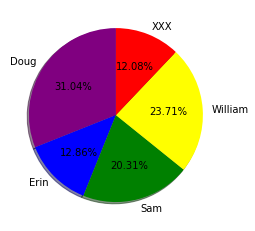

In [10]:
# Group by MANAGER and Count the number of records by REGION
manager = orders_data.groupby("MANAGER")['REGION'].count()
labels = manager.index
plt.pie(manager, autopct='%1.2f%%',labels=labels, colors=['purple','blue','green','yellow','red'], shadow=True, startangle=90)

# Save Figure
plt.savefig("./Images/manager_by_region.png")
plt.show()

# Returns Analysis

In [11]:
orders_data['ORDER_STATUS'] = orders_data['ORDER_STATUS'].fillna(0)
orders_data.head()

,Unnamed: 0,ROW_ID,ORDER_ID,ORDER_DATE,PRIORITY,QUANTITY,SALES,DISCOUNT,MODE,PROFIT,...,SEGMENT,CATEGORY,SUB_CATEGORY,PRODUCT_NAME,PRODUCT_CONTAINER,SHIP_DATE,MANAGER,CUSTOMER_NAME,CUSTOMER_TYPE,ORDER_STATUS
0,0,1,3,10/13/1982,Low,6,261.54,0.04,Regular Air,-213.25,...,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,10/20/2010,XXX,Muhammed MacIntyre,Type - E,0
1,1,1930,13795,4/10/2011,Not Specified,37,1302.99,0.02,Regular Air,545.49,...,Small Business,Office Supplies,Paper,Xerox 1932,Small Box,4/11/2011,XXX,Muhammed MacIntyre,Type - E,0
2,2,1929,13795,4/10/2011,Not Specified,23,275.16,0.05,Express Air,43.35,...,Small Business,Office Supplies,Paper,Xerox 188,Small Box,4/13/2011,XXX,Muhammed MacIntyre,Type - E,0
3,3,1928,13795,4/10/2011,Not Specified,30,501.32,0.04,Regular Air,-119.08,...,Small Business,Office Supplies,Binders and Binder Accessories,"GBC Pre-Punched Binding Paper, Plastic, White,...",Small Box,4/13/2011,XXX,Muhammed MacIntyre,Type - E,0
4,4,2384,17286,9/21/2010,High,7,1810.67,0.09,Delivery Truck,-541.87,...,Small Business,Furniture,Chairs & Chairmats,Global Enterprise Series Seating High-Back Swi...,Jumbo Drum,9/22/2010,XXX,Muhammed MacIntyre,Type - E,0


In [12]:
# Group the ORDER_STATUS and count the ORDER_ID so we can know the number of return orders
returns = orders_data.groupby('ORDER_STATUS')
total_returns = returns.count()['ORDER_ID']

# Searching for the uniques ORDER_ID returned in the DATASET
unique_return = returns.nunique()["ORDER_ID"]
total_returns, unique_return

# Create data frame and cleaning format
summary_return = pd.DataFrame({"Total Order_ID return": total_returns, 
                                "Total Unique Order_ID return": unique_return})
summary_return

,Total Order_ID return,Total Unique Order_ID return
ORDER_STATUS,,
0,7527,4924
Returned,872,572


# Most Popular Products

* Retrieve the Product Name and Unit Price columns


* Group by Product Name. Perform calculations to obtain price count, item price, and total pricee value


* Create a summary data frame to hold the results

In [14]:
# Create new data frame and group Product Name
product = orders_data[["PRODUCT_NAME", "UNIT_PRICE"]]
popular_product = product.groupby(["PRODUCT_NAME"])

# Do calculations to obtain price count, item price, and total price value
product_count = popular_product["UNIT_PRICE"].count()
price_value = (popular_product["UNIT_PRICE"].sum()) 
product_price = price_value/product_count

# Create data frame
most_popular = pd.DataFrame({"Product Count": product_count, 
                             "Product Price": product_price,
                             "Total Price Value":price_value})

# Descending order
summary_popular = most_popular.sort_values(["Product Count"], ascending=False).head()

# cleaner formatting
summary_popular.style.format({"Product Price":"${:,.2f}",
                              "Total Price Value":"${:,.2f}"})

,Product Count,Product Price,Total Price Value
PRODUCT_NAME,,,
"Global High-Back Leather Tilter, Burgundy",24,$122.99,"$2,951.76"
BoxOffice By Design Rectangular and Half-Moon Meeting Room Tables,22,$218.75,"$4,812.50"
Fiskars® Softgrip Scissors,22,$10.98,$241.56
"Master Giant Foot® Doorstop, Safety Yellow",22,$7.59,$166.98
Bevis 36 x 72 Conference Tables,22,$124.49,"$2,738.78"


# Most Profitable Products

* Sort the above table by total purchase value in descending order

In [15]:
# Take the most_popular product data frame and change the sorting to find highest total price value
summary_popular = most_popular.sort_values(["Total Price Value"],ascending=False).head()
#print(summary_popular)

# cleaner formatting
summary_popular.style.format({"Product Price":"${:,.2f}",
                                "Total Price Value":"${:,.2f}"})

,Product Count,Product Price,Total Price Value
PRODUCT_NAME,,,
Polycom ViewStation ISDN Videoconferencing Unit,7,"$6,783.02","$47,481.14"
Canon imageCLASS 2200 Advanced Copier,7,"$3,499.99","$24,499.93"
Okidata Pacemark 4410N Wide Format Dot Matrix Printer,6,"$3,502.14","$21,012.84"
Epson DFX-8500 Dot Matrix Printer,7,"$2,550.14","$17,850.98"
Polycom ViewStation Adapter H323 Videoconferencing Unit,8,"$1,938.02","$15,504.16"


# Relation between Sales & Shipping Cost by Ship Date

           Total Sales per Day  Total Ship Cost  \
SHIP_DATE                                         
1/1/2010             4575.0100            48.96   
1/1/2011              299.1100             5.01   
1/1/2012             8626.2500            97.10   
1/10/2009           50542.8700           108.46   
1/10/2010           23259.5235            53.13   
...                        ...              ...   
9/8/2012            10970.6780           110.91   
9/9/2009             5721.6500            81.76   
9/9/2010             1348.7700            25.58   
9/9/2011             7567.6100            76.74   
9/9/2012            10700.6500           190.30   

           Relation between Sales & Shipping Cost  
SHIP_DATE                                          
1/1/2010                                93.443832  
1/1/2011                                59.702595  
1/1/2012                                88.838826  
1/10/2009                              466.004702  
1/10/2010               

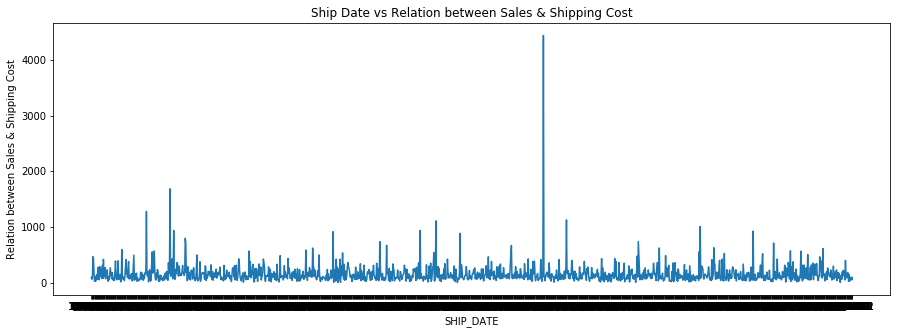

In [16]:
#Groupby 'Date' and making the operations to obtain the Relation between Sales & Shipping Cost for all the ship dates
new_df = orders_data.groupby(['SHIP_DATE'])

#Summary statistics
total_sales = new_df['SALES'].sum()
total_ship = new_df['SHIPPING_COSTS'].sum()

#Summary table
index_df = pd.DataFrame({
    "Total Sales per Day": total_sales,
    "Total Ship Cost": total_ship,
    "Relation between Sales & Shipping Cost": total_sales / total_ship  
})
print(index_df)

#Plotting values 
fig = plt.figure(figsize=(15,5))
y = index_df['Relation between Sales & Shipping Cost']
x = index_df.index
plt.title('Ship Date vs Relation between Sales & Shipping Cost')
plt.xlabel('SHIP_DATE')
plt.ylabel('Relation between Sales & Shipping Cost')
plt.plot(x,y)

In [17]:
# Print the maximum sale 
max_sale = index_df['Relation between Sales & Shipping Cost'].max()
max_sale_day = index_df['Relation between Sales & Shipping Cost'].idxmax()
#max_sale, max_sale_day

print(f'The Maximun Sale is: {max_sale}')
print(f'The Maximun Date Sale is: {max_sale_day}')

The Maximun Sale is: 4437.6505405405205
The Maximun Date Sale is: 5/13/2012
